In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [11]:
df= pd.read_csv('Loan_Defaults.csv')

In [12]:
df.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES
0,655269,53478,63558,86.54,67,22807,45,1497,01-01-1974,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,723482,55513,63163,89.45,67,22807,45,1497,20-05-1985,Self employed,...,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
2,758529,65282,84320,79.93,78,23135,86,2071,14-10-1995,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,763449,46905,63896,76.58,78,17014,45,2070,01-06-1973,Self employed,...,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
4,708663,51428,63896,86.08,78,17014,45,2069,01-06-1972,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0


In [13]:
df.shape

(112392, 40)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112392 entries, 0 to 112391
Data columns (total 40 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UNIQUEID                             112392 non-null  int64  
 1   DISBURSED_AMOUNT                     112392 non-null  int64  
 2   ASSET_COST                           112392 non-null  int64  
 3   LTV                                  112392 non-null  float64
 4   BRANCH_ID                            112392 non-null  int64  
 5   SUPPLIER_ID                          112392 non-null  int64  
 6   MANUFACTURER_ID                      112392 non-null  int64  
 7   CURRENT_PINCODE_ID                   112392 non-null  int64  
 8   DATE_OF_BIRTH                        112392 non-null  object 
 9   EMPLOYMENT_TYPE                      108949 non-null  object 
 10  DISBURSAL_DATE                       112392 non-null  object 
 11  STATE_ID     

In [15]:
df['MANUFACTURER_ID'].value_counts()

86     51669
45     30427
51     13723
48      6254
49      4592
120     4391
67       959
145      360
153       13
152        3
155        1
Name: MANUFACTURER_ID, dtype: int64

In [16]:
df.isnull().sum().sum()

3443

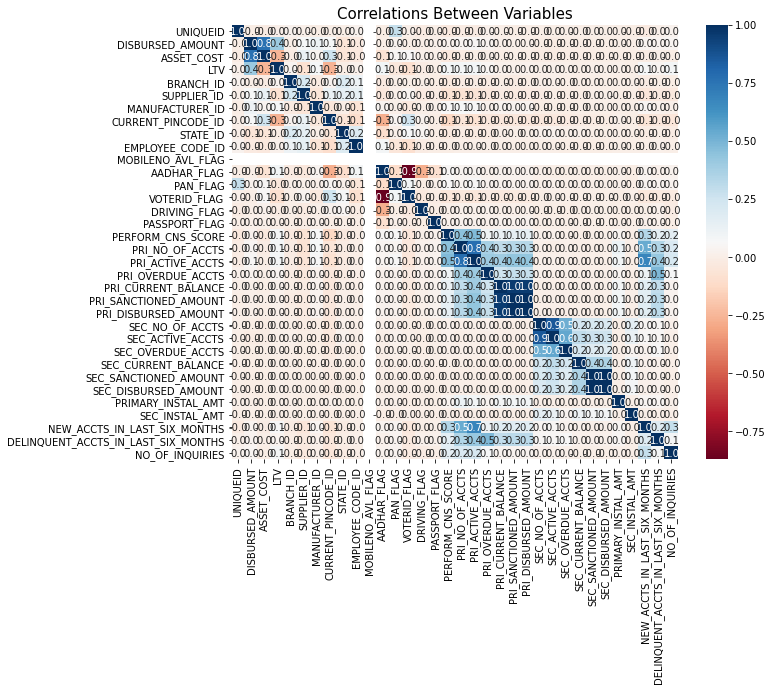

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu",annot=True, fmt=".1f")
plt.title("Correlations Between Variables", size=15)
plt.show();

In [18]:
# drop the columns that don't have any impact on data
df2= df.drop(['UNIQUEID','BRANCH_ID','SUPPLIER_ID','MANUFACTURER_ID','CURRENT_PINCODE_ID','STATE_ID','EMPLOYEE_CODE_ID','MOBILENO_AVL_FLAG','AADHAR_FLAG','PAN_FLAG','VOTERID_FLAG','DRIVING_FLAG','PASSPORT_FLAG'], axis=1)
df2

,DISBURSED_AMOUNT,ASSET_COST,LTV,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,...,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES
0,53478,63558,86.54,01-01-1974,Salaried,03-11-2018,0,No Bureau History Available,0,0,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,55513,63163,89.45,20-05-1985,Self employed,20-11-2018,749,C-Very Low Risk,2,1,...,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
2,65282,84320,79.93,14-10-1995,Salaried,29-11-2018,0,No Bureau History Available,0,0,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,46905,63896,76.58,01-06-1973,Self employed,29-11-2018,14,Not Scored: Only a Guarantor,1,1,...,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
4,51428,63896,86.08,01-06-1972,Salaried,17-11-2018,0,No Bureau History Available,0,0,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112387,44875,72509,67.58,14-05-1992,Self employed,28-11-2018,0,No Bureau History Available,0,0,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
112388,53549,72509,78.61,24-04-1984,Self employed,19-11-2018,0,No Bureau History Available,0,0,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
112389,55243,72509,81.37,01-01-1986,Self employed,17-11-2018,785,B-Very Low Risk,2,0,...,0,0,0,0,0,0,0,4yrs 10mon,9yrs 5mon,0
112390,55243,72509,81.37,01-01-1973,Self employed,15-11-2018,714,D-Very Low Risk,1,1,...,0,0,0,0,0,1,1,0yrs 3mon,0yrs 3mon,0


# To show the correlation between different columns

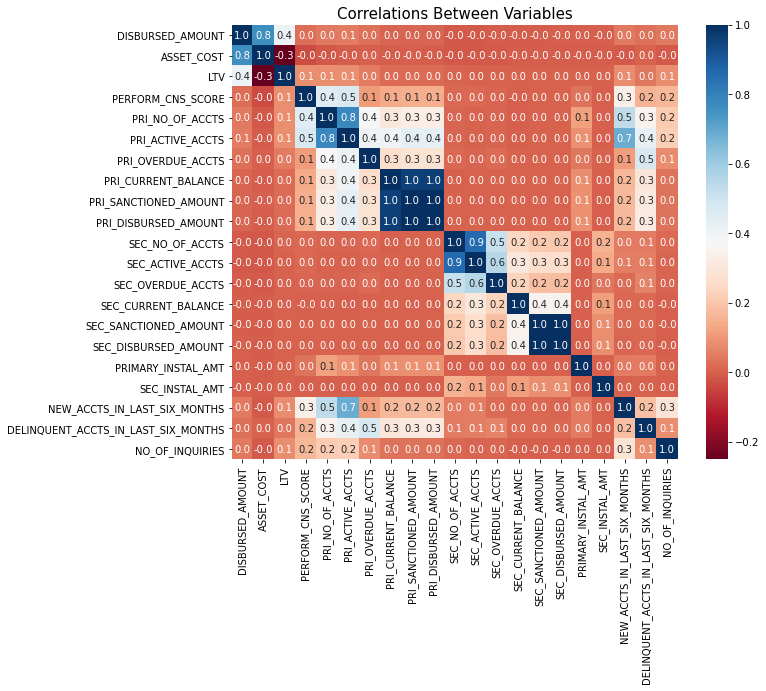

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(), cmap="RdBu",annot=True, fmt=".1f")
plt.title("Correlations Between Variables", size=15)
plt.show();

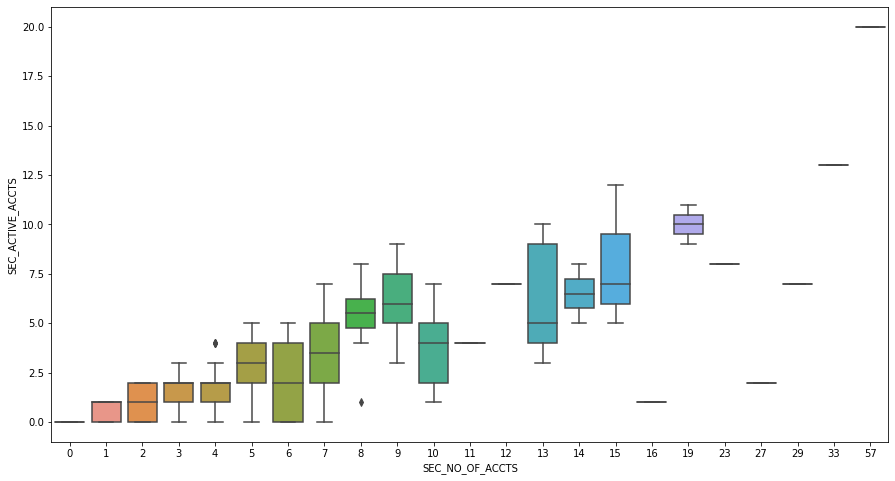

In [20]:
plt.figure(figsize=(15,8))
sns.boxplot(x="SEC_NO_OF_ACCTS", y="SEC_ACTIVE_ACCTS",data=df2);

Text(0.5, 1.0, 'Employment Type')

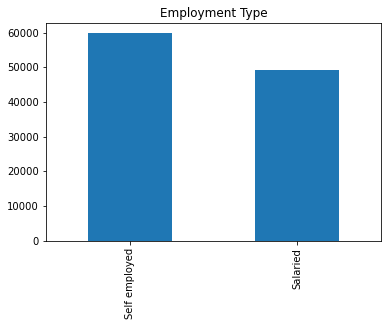

In [34]:
df['EMPLOYMENT_TYPE'].value_counts().plot.bar()
plt.title('Employment Type')

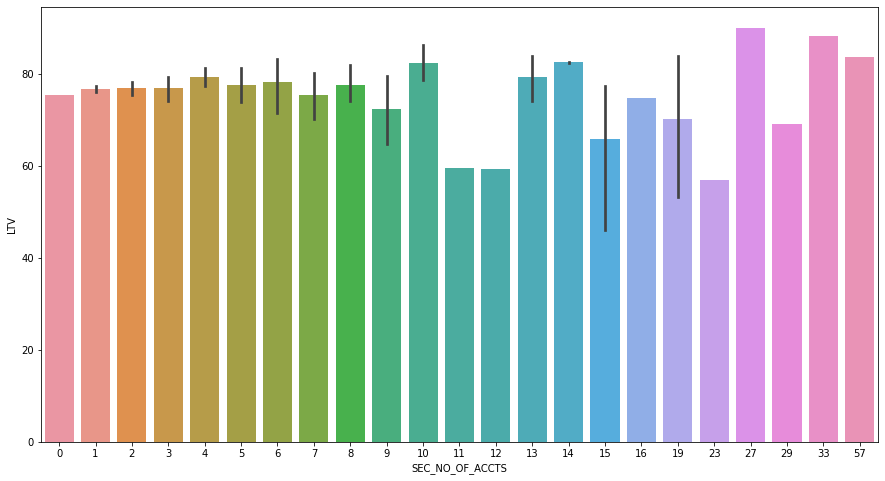

In [32]:
plt.figure(figsize=(15,8))
sns.barplot(x='SEC_NO_OF_ACCTS', y='LTV',data=df2);